In [1]:
import torch
import torch.nn as nn
from torchvision import transforms
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision.utils import draw_bounding_boxes
from torchvision.ops import box_convert
from torch.utils.data import TensorDataset


from project2_functions import *
from project2_objects import *
from project2_models import *
from project2_constants import DEVICE as device
from project2_constants import SEED

In [2]:
torch.manual_seed(SEED)
torch.set_default_dtype(torch.double)

## 2 Object Localization
#### First we load and inspect the localization datasets

In [3]:
loc_train = torch.load('data/localization_train.pt')
loc_val = torch.load('data/localization_val.pt')
loc_test = torch.load('data/localization_test.pt')

In [4]:
print(f'Train data size: {len(loc_train)}')
print(f'Val data size: {len(loc_val)}')
print(f'Test data size: {len(loc_test)}')

Train data size: 59400
Val data size: 6600
Test data size: 11000


In [5]:
first_img, first_label = loc_train[0]

print(f'Shape of first image: {first_img.shape}')
print(f'Type of first image: {type(first_img)}')

print(f'\nShape of first label: {first_label.shape}')
print(f'Type of first label: {type(first_label)})')
first_label

Shape of first image: torch.Size([1, 48, 60])
Type of first image: <class 'torch.Tensor'>

Shape of first label: torch.Size([6])
Type of first label: <class 'torch.Tensor'>)


tensor([1.0000, 0.6000, 0.2292, 0.3667, 0.4167, 4.0000], dtype=torch.float32)

In [6]:
count_instances(loc_train, 'Training Data')
count_instances(loc_val, 'Validation Data')
count_instances(loc_test, 'Test Data')

Class distribution in Training Data
0: 5345
1: 6075
2: 5365
3: 5522
4: 5243
5: 4889
6: 5310
7: 5644
8: 5249
9: 5358
99: 5400
Class distribution in Validation Data
0: 578
1: 667
2: 593
3: 609
4: 599
5: 532
6: 608
7: 621
8: 602
9: 591
99: 600
Class distribution in Test Data
0: 980
1: 1135
2: 1032
3: 1010
4: 982
5: 892
6: 958
7: 1028
8: 974
9: 1009
99: 1000


#### Plotting some images

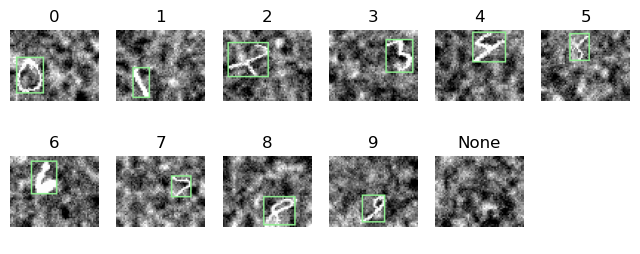

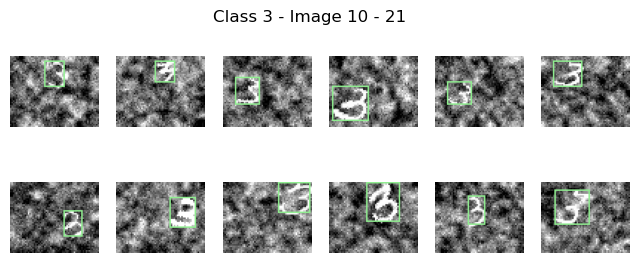

In [7]:
imgs = torch.stack([img for img,_ in loc_train])
labels = torch.stack([label for _,label in loc_train])

plot_localization_data(imgs, labels)
plot_localization_data(imgs, labels, class_label=3, start_idx=10)

#### Defining a normalizer and a preprocessor

In [8]:
loc_train_norm, loc_val_norm, loc_test_norm = normalizer(loc_train, loc_val, loc_test)

#### Defining models

In [9]:
n_epochs = 20
batch_size = 64
lr = 0.01
momentum = 0.9
decay= 0.001

In [10]:
train_loader = torch.utils.data.DataLoader(loc_train_norm, batch_size=batch_size, shuffle=False)
val_loader = torch.utils.data.DataLoader(loc_val_norm, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(loc_test_norm, batch_size=batch_size, shuffle=False)

loss_fn = LocalizationLoss()

12:56:37  |  Epoch 1  |  Training loss 1.951
12:56:37  |  Epoch 1  |  Validation loss 1.204
Estimated time left: 4m 9s
12:56:50  |  Epoch 2  |  Training loss 0.796
12:56:50  |  Epoch 2  |  Validation loss 0.587
Estimated time left: 3m 52s
12:57:02  |  Epoch 3  |  Training loss 0.473
12:57:02  |  Epoch 3  |  Validation loss 0.465
Estimated time left: 3m 38s
12:57:15  |  Epoch 4  |  Training loss 0.360
12:57:15  |  Epoch 4  |  Validation loss 0.449
Estimated time left: 3m 24s
12:57:28  |  Epoch 5  |  Training loss 0.300
12:57:28  |  Epoch 5  |  Validation loss 0.444
Estimated time left: 3m 13s
12:57:41  |  Epoch 6  |  Training loss 0.256
12:57:41  |  Epoch 6  |  Validation loss 0.413
Estimated time left: 3m 0s
12:57:54  |  Epoch 7  |  Training loss 0.227
12:57:54  |  Epoch 7  |  Validation loss 0.417
Estimated time left: 2m 47s
12:58:07  |  Epoch 8  |  Training loss 0.206
12:58:07  |  Epoch 8  |  Validation loss 0.405
Estimated time left: 2m 35s
12:58:20  |  Epoch 9  |  Training loss 0.1

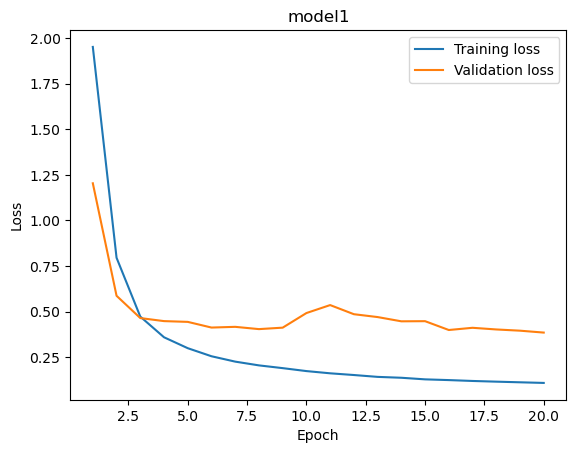

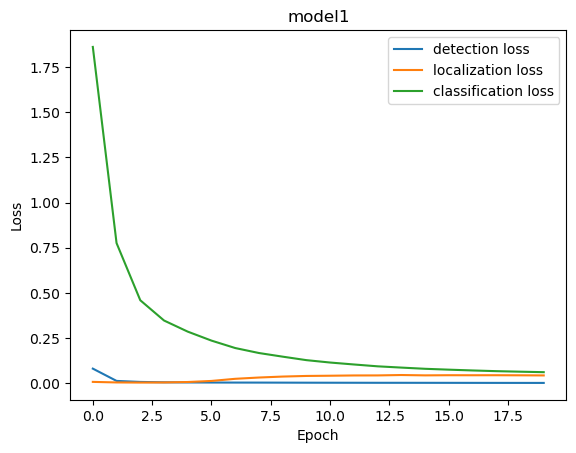

In [11]:
model_name = 'model1'

torch.manual_seed(SEED)
model1 = LocCNN1((48,60,1))
model1.to(device=device, dtype=torch.double)
optimizer = optim.SGD(model1.parameters(), lr=lr, momentum=momentum, weight_decay=decay)

loss_train1, loss_val1, train_perform1, val_perform1, losses_separated1 = train(
    n_epochs=n_epochs,
    optimizer=optimizer,
    model=model1,
    loss_fn=loss_fn,
    train_loader=train_loader,
    val_loader=val_loader,
    performance_calculator=localization_performance
)

plot_loss(loss_train1, loss_val1, model_name, save_model=True)
plot_lists(losses_separated1, ['detection loss', 'localization loss', 'classification loss'], model_name, save_model=True)

13:01:07  |  Epoch 1  |  Training loss 2.352
13:01:07  |  Epoch 1  |  Validation loss 1.974
Estimated time left: 6m 54s
13:01:28  |  Epoch 2  |  Training loss 1.714
13:01:28  |  Epoch 2  |  Validation loss 1.189
Estimated time left: 6m 31s
13:01:50  |  Epoch 3  |  Training loss 0.677
13:01:50  |  Epoch 3  |  Validation loss 0.567
Estimated time left: 6m 9s
13:02:12  |  Epoch 4  |  Training loss 0.368
13:02:12  |  Epoch 4  |  Validation loss 0.381
Estimated time left: 5m 47s
13:02:33  |  Epoch 5  |  Training loss 0.263
13:02:33  |  Epoch 5  |  Validation loss 0.280
Estimated time left: 5m 26s
13:02:55  |  Epoch 6  |  Training loss 0.216
13:02:55  |  Epoch 6  |  Validation loss 0.249
Estimated time left: 5m 3s
13:03:16  |  Epoch 7  |  Training loss 0.184
13:03:16  |  Epoch 7  |  Validation loss 0.296
Estimated time left: 4m 41s
13:03:38  |  Epoch 8  |  Training loss 0.173
13:03:38  |  Epoch 8  |  Validation loss 0.230
Estimated time left: 4m 19s
13:03:59  |  Epoch 9  |  Training loss 0.1

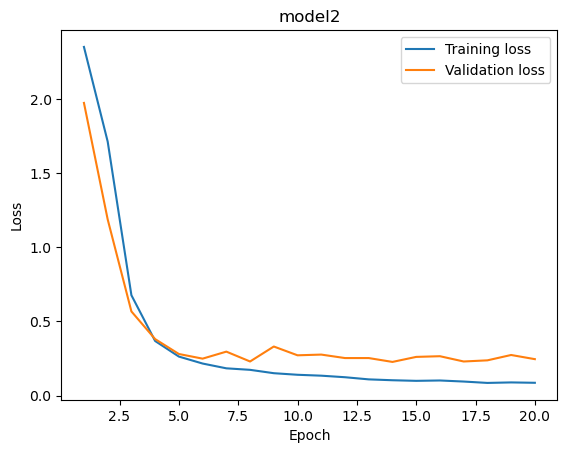

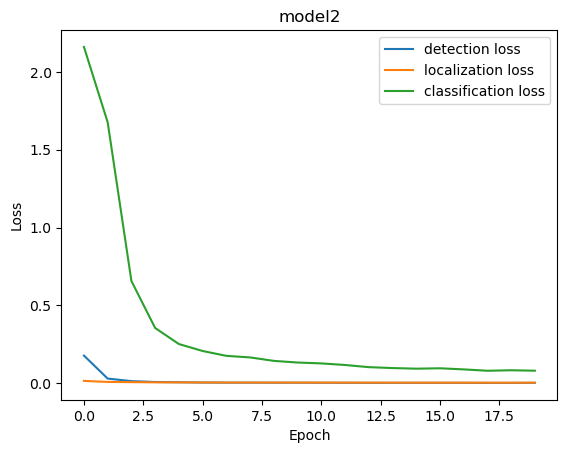

In [12]:
model_name = 'model2'

torch.manual_seed(SEED)
model2 = LocCNN2((48,60,1))
model2.to(device=device)
optimizer = optim.SGD(model2.parameters(), lr=lr, momentum=momentum, weight_decay=decay)

loss_train2, loss_val2, train_perform2, val_perform2, losses_separated2 = train(
    n_epochs=n_epochs,
    optimizer=optimizer,
    model=model2,
    loss_fn=loss_fn,
    train_loader=train_loader,
    val_loader=val_loader,
    performance_calculator=localization_performance
)

plot_loss(loss_train2, loss_val2, model_name, save_model=True)
plot_lists(losses_separated2, ['detection loss', 'localization loss', 'classification loss'], model_name, save_model=True)

13:08:28  |  Epoch 1  |  Training loss 2.382
13:08:28  |  Epoch 1  |  Validation loss 2.086
Estimated time left: 6m 57s
13:08:50  |  Epoch 2  |  Training loss 1.972
13:08:50  |  Epoch 2  |  Validation loss 1.724
Estimated time left: 6m 34s
13:09:12  |  Epoch 3  |  Training loss 1.230
13:09:12  |  Epoch 3  |  Validation loss 0.872
Estimated time left: 6m 13s
13:09:34  |  Epoch 4  |  Training loss 0.639
13:09:34  |  Epoch 4  |  Validation loss 0.424
Estimated time left: 5m 51s
13:09:56  |  Epoch 5  |  Training loss 0.439
13:09:56  |  Epoch 5  |  Validation loss 0.330
Estimated time left: 5m 29s
13:10:17  |  Epoch 6  |  Training loss 0.358
13:10:17  |  Epoch 6  |  Validation loss 0.313
Estimated time left: 5m 7s
13:10:39  |  Epoch 7  |  Training loss 0.323
13:10:39  |  Epoch 7  |  Validation loss 0.258
Estimated time left: 4m 45s
13:11:01  |  Epoch 8  |  Training loss 0.283
13:11:01  |  Epoch 8  |  Validation loss 0.259
Estimated time left: 4m 23s
13:11:24  |  Epoch 9  |  Training loss 0.

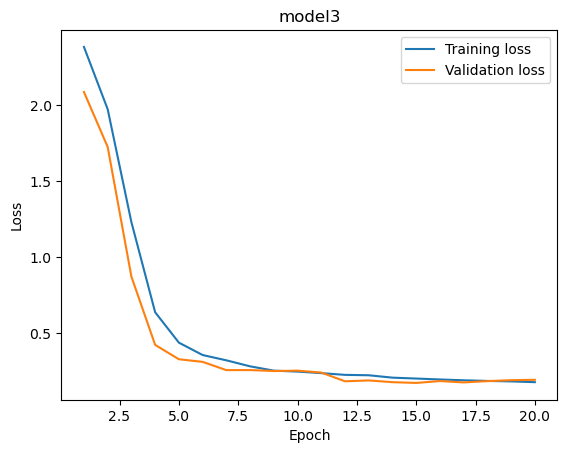

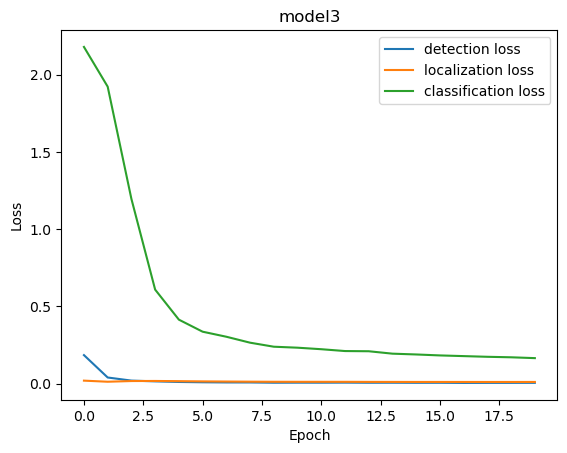

In [13]:
model_name = 'model3'

torch.manual_seed(SEED)
model3 = LocCNN3((48,60,1))
model3.to(device=device)
optimizer = optim.SGD(model3.parameters(), lr=lr, momentum=momentum, weight_decay=decay)

loss_train3, loss_val3, train_perform3, val_perform3, losses_separated3 = train(
    n_epochs=n_epochs,
    optimizer=optimizer,
    model=model3,
    loss_fn=loss_fn,
    train_loader=train_loader,
    val_loader=val_loader,
    performance_calculator=localization_performance
)

plot_loss(loss_train3, loss_val3, model_name, save_model=True)
plot_lists(losses_separated3, ['detection loss', 'localization loss', 'classification loss'], model_name, save_model=True)

13:19:39  |  Epoch 1  |  Training loss 2.630
13:19:39  |  Epoch 1  |  Validation loss 2.603
Estimated time left: 16m 22s
13:23:44  |  Epoch 2  |  Training loss 2.385
13:23:44  |  Epoch 2  |  Validation loss 2.117
Estimated time left: 12m 16s
13:27:50  |  Epoch 3  |  Training loss 1.845
13:27:50  |  Epoch 3  |  Validation loss 1.436
Estimated time left: 8m 11s
13:31:55  |  Epoch 4  |  Training loss 0.853
13:31:55  |  Epoch 4  |  Validation loss 0.593
Estimated time left: 4m 5s
13:36:01  |  Epoch 5  |  Training loss 0.434
13:36:01  |  Epoch 5  |  Validation loss 0.410
Estimated time left: 0m 0s
Training performance: [0.9242087542087541, 0.4500632875434513, 0.6871360208761027]
Validation performance:[0.8846969696969696, 0.4465268896440758, 0.6656119296705227]


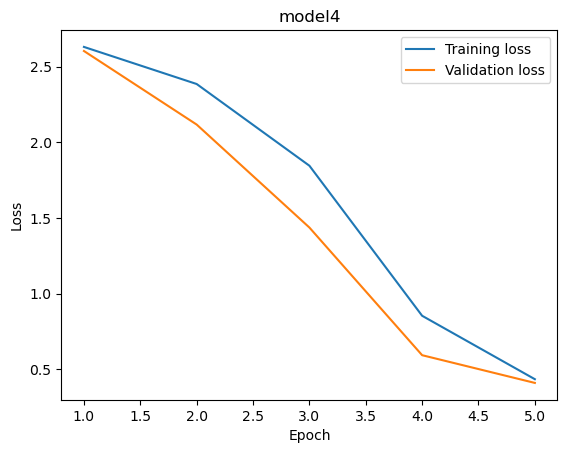

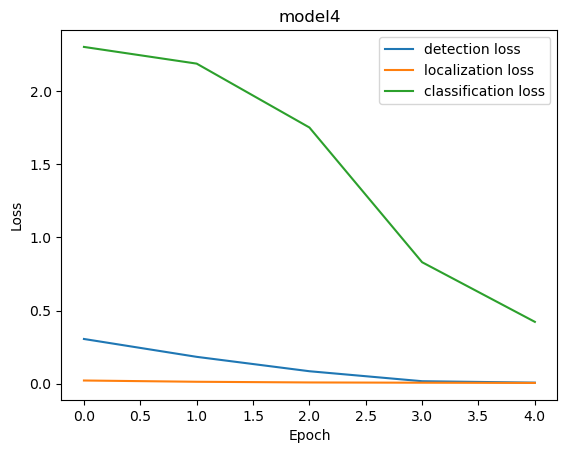

In [14]:
model_name = 'model4'

torch.manual_seed(SEED)
model4 = LocCNN4((48,60,1))
model4.to(device=device)
optimizer = optim.SGD(model4.parameters(), lr=0.01, momentum=0.9, weight_decay=0.001)

loss_train4, loss_val4, train_perform4, val_perform4, losses_separated4 = train(
    n_epochs=5,
    optimizer=optimizer,
    model=model4,
    loss_fn=loss_fn,
    train_loader=train_loader,
    val_loader=val_loader,
    performance_calculator=localization_performance
)

plot_loss(loss_train4, loss_val4, model_name, save_model=True)
plot_lists(losses_separated4, ['detection loss', 'localization loss', 'classification loss'], model_name, save_model=True)

13:37:41  |  Epoch 1  |  Training loss 2.305
13:37:41  |  Epoch 1  |  Validation loss 2.032
Estimated time left: 9m 47s
13:38:12  |  Epoch 2  |  Training loss 1.624
13:38:12  |  Epoch 2  |  Validation loss 0.958
Estimated time left: 9m 14s
13:38:43  |  Epoch 3  |  Training loss 0.782
13:38:43  |  Epoch 3  |  Validation loss 0.549
Estimated time left: 8m 44s
13:39:14  |  Epoch 4  |  Training loss 0.526
13:39:14  |  Epoch 4  |  Validation loss 0.429
Estimated time left: 8m 13s
13:39:44  |  Epoch 5  |  Training loss 0.417
13:39:44  |  Epoch 5  |  Validation loss 0.427
Estimated time left: 7m 41s
13:40:15  |  Epoch 6  |  Training loss 0.361
13:40:15  |  Epoch 6  |  Validation loss 0.368
Estimated time left: 7m 10s
13:40:46  |  Epoch 7  |  Training loss 0.316
13:40:46  |  Epoch 7  |  Validation loss 0.359
Estimated time left: 6m 39s
13:41:16  |  Epoch 8  |  Training loss 0.289
13:41:16  |  Epoch 8  |  Validation loss 0.397
Estimated time left: 6m 8s
13:41:47  |  Epoch 9  |  Training loss 0.

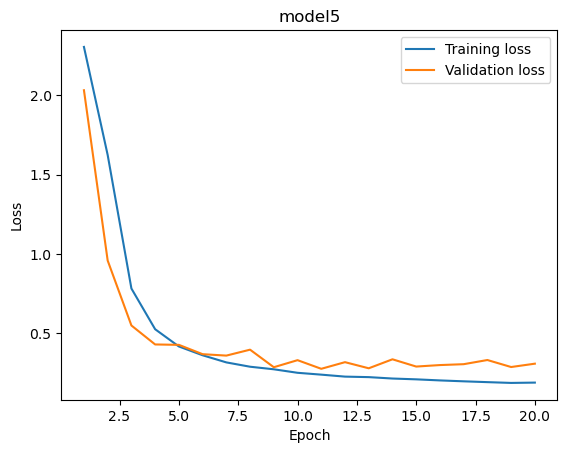

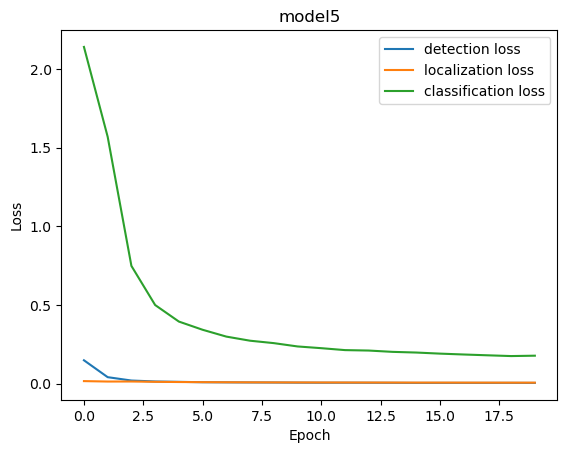

In [15]:
model_name = 'model5'

torch.manual_seed(SEED)
model5 = LocCNN5((48,60,1))
model5.to(device=device)
optimizer = optim.SGD(model5.parameters(), lr=lr, momentum=momentum, weight_decay=decay)

loss_train5, loss_val5, train_perform5, val_perform5, losses_separated5 = train(
    n_epochs=n_epochs,
    optimizer=optimizer,
    model=model5,
    loss_fn=loss_fn,
    train_loader=train_loader,
    val_loader=val_loader,
    performance_calculator=localization_performance
)

plot_loss(loss_train5, loss_val5, model_name, save_model=True)
plot_lists(losses_separated5, ['detection loss', 'localization loss', 'classification loss'], model_name, save_model=True)

#### Model Selection

In [16]:
best_model, best_performance = model_selector([model1, model2, model3, model5], [val_perform1[-1],val_perform2[-1],val_perform3[-1],val_perform5[-1]])

# Print additional details of the best model
print("Best Model Details\n--------------------------------------------------------------")
print(f"Network architecture/ layout: {best_model}\n")
#print(f"Optimizer Parameters: {best_data.optimizer}")
print(f"Validation Performance: {best_performance}")

Best Model Details
--------------------------------------------------------------
Network architecture/ layout: LocCNN2(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 2), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=384, out_features=100, bias=True)
  (fc2): L

#### Model Evaluation

In [17]:
test_performance = localization_performance(best_model, test_loader)
print(10*'-'+'Test Performance' + 10*'-')
print(f"Test Accuracy: {test_performance[0]}\nTest IOU: {test_performance[1]}\nOverall Performance: {test_performance[2]}")

----------Test Performance----------
Test Accuracy: 0.9442727272727273
Test IOU: 0.5020499766985925
Overall Performance: 0.7231613519856599


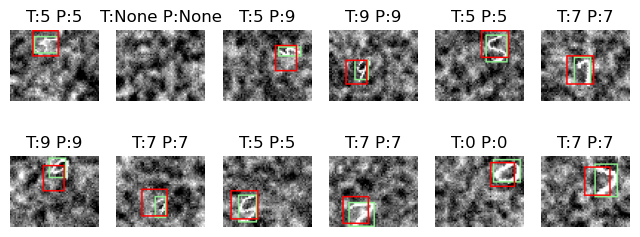

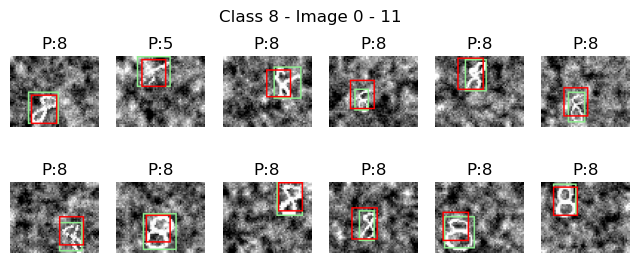

In [18]:
y_true, y_pred = predict(best_model, test_loader)
test_imgs = torch.stack([img for img,_ in loc_test])

plot_localization_data(test_imgs, y_true=y_true, y_preds=y_pred, start_idx=0, save_model=True)
plot_localization_data(test_imgs, y_true=y_true, y_preds=y_pred, class_label=8, start_idx=0, save_model=True)

# 3 Object Detection

#### Loading the data and inspecting the data

In [19]:
import torch
import torch.nn as nn
from torchvision import transforms
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision.utils import draw_bounding_boxes
from torchvision.ops import box_convert
from torch.utils.data import TensorDataset


from project2_functions import *
from project2_objects import *
from project2_models import *
from project2_constants import DEVICE as device
from project2_constants import SEED

torch.set_default_dtype(torch.double)

In [20]:
train_labels = torch.load('data/list_y_true_train.pt')
val_labels = torch.load('data/list_y_true_val.pt')
test_labels = torch.load('data/list_y_true_test.pt')

In [21]:
print(f'Train label size: {len(train_labels)}')
print(f'Val label size: {len(val_labels)}')
print(f'Test label size: {len(test_labels)}')

Train label size: 26874
Val label size: 2967
Test label size: 4981


In [22]:
train_imgs = torch.load('data/detection_train.pt')
val_imgs = torch.load('data/detection_val.pt')
test_imgs = torch.load('data/detection_test.pt')

In [23]:
train_labels_local = prepare_labels(train_labels, (2,3,6))
val_labels_local = prepare_labels(val_labels, (2,3,6))
test_labels_local = prepare_labels(test_labels, (2,3,6))

In [24]:
det_train = merge_datasets(train_imgs, train_labels_local)
det_val = merge_datasets(val_imgs, val_labels_local)
det_test = merge_datasets(test_imgs, test_labels_local)

#### Plotting some images from the detection dataset

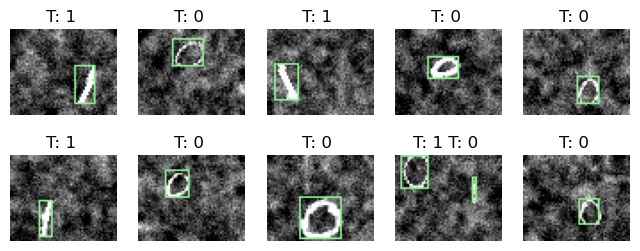

In [25]:
imgs = [img for img,_ in train_imgs]
plot_detection_data(imgs, train_labels, start_idx=10)

#### Normalizing the dataset TBD

In [26]:
det_train_norm, det_val_norm, det_test_norm = normalizer(det_train, det_val, det_test)

In [27]:
train_loader = torch.utils.data.DataLoader(det_train_norm, batch_size=64, shuffle=False)
val_loader = torch.utils.data.DataLoader(det_val_norm, batch_size=64, shuffle=False)
test_loader = torch.utils.data.DataLoader(det_test_norm, batch_size=64, shuffle=False)

loss_fn = DetectionLoss()

#### Defining models

In [28]:
train_loader = torch.utils.data.DataLoader(det_train_norm, batch_size=batch_size, shuffle=False)
val_loader = torch.utils.data.DataLoader(det_val_norm, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(det_test_norm, batch_size=batch_size, shuffle=False)

loss_fn = DetectionLoss()

13:48:01  |  Epoch 1  |  Training loss 1.208
13:48:01  |  Epoch 1  |  Validation loss 0.726
Estimated time left: 2m 38s
13:48:09  |  Epoch 2  |  Training loss 0.347
13:48:09  |  Epoch 2  |  Validation loss 0.225
Estimated time left: 2m 27s
13:48:17  |  Epoch 3  |  Training loss 0.154
13:48:17  |  Epoch 3  |  Validation loss 0.106
Estimated time left: 2m 18s
13:48:25  |  Epoch 4  |  Training loss 0.092
13:48:25  |  Epoch 4  |  Validation loss 0.082
Estimated time left: 2m 10s
13:48:34  |  Epoch 5  |  Training loss 0.069
13:48:34  |  Epoch 5  |  Validation loss 0.080
Estimated time left: 2m 1s
13:48:42  |  Epoch 6  |  Training loss 0.056
13:48:42  |  Epoch 6  |  Validation loss 0.073
Estimated time left: 1m 53s
13:48:50  |  Epoch 7  |  Training loss 0.050
13:48:50  |  Epoch 7  |  Validation loss 0.066
Estimated time left: 1m 45s
13:48:58  |  Epoch 8  |  Training loss 0.045
13:48:58  |  Epoch 8  |  Validation loss 0.063
Estimated time left: 1m 37s
13:49:06  |  Epoch 9  |  Training loss 0.

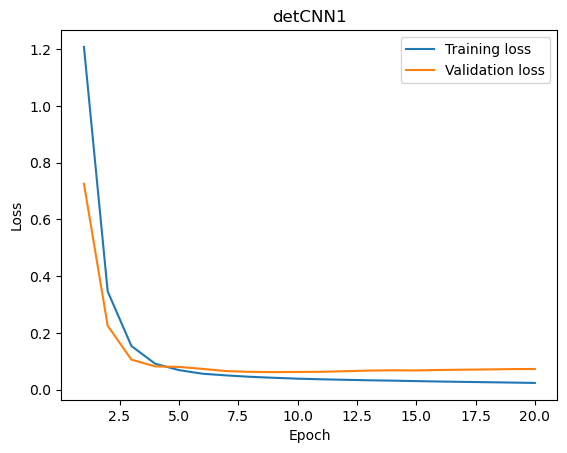

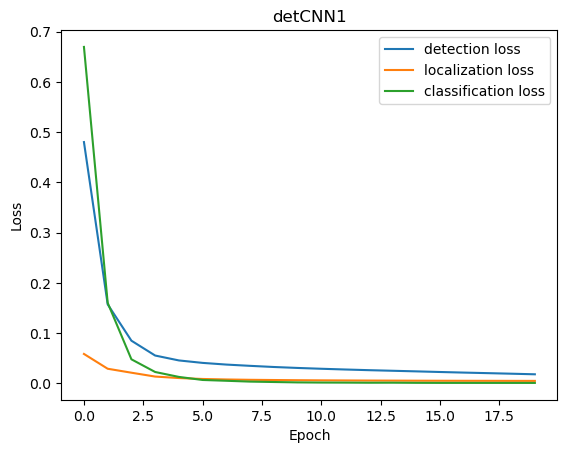

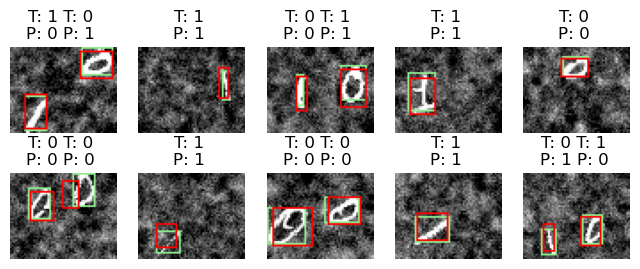

In [29]:
model_name = 'detCNN1'
torch.manual_seed(SEED)
modelcnn1 = DetCNN1()
modelcnn1.to(device=device)
optimizer = optim.SGD(modelcnn1.parameters(), lr=lr, momentum=momentum, weight_decay=decay)

loss_train1, loss_val1, train_performance1, val_performance1, losses_separated1 = train(
    n_epochs=n_epochs,
    optimizer=optimizer,
    model=modelcnn1,
    loss_fn=loss_fn,
    train_loader=train_loader,
    val_loader=val_loader,
    performance_calculator=detection_performance
)

plot_loss(loss_train1, loss_val1, model_name, save_model=True)
plot_lists(losses_separated1, ['detection loss', 'localization loss', 'classification loss'], model_name, save_model=True)
y_true, y_pred = predict(modelcnn1, val_loader, binary_class=True)
imgs = [img for img,_ in val_imgs]
y_pred_reshaped = y_pred.permute(0,2,3,1)
y_pred_global = local_to_global_list(y_pred_reshaped)
plot_detection_data(imgs, val_labels, y_pred_global, start_idx=10)

13:51:22  |  Epoch 1  |  Training loss 0.783
13:51:22  |  Epoch 1  |  Validation loss 0.210
Estimated time left: 3m 48s
13:51:34  |  Epoch 2  |  Training loss 0.141
13:51:34  |  Epoch 2  |  Validation loss 0.103
Estimated time left: 3m 34s
13:51:46  |  Epoch 3  |  Training loss 0.087
13:51:46  |  Epoch 3  |  Validation loss 0.086
Estimated time left: 3m 21s
13:51:58  |  Epoch 4  |  Training loss 0.069
13:51:58  |  Epoch 4  |  Validation loss 0.077
Estimated time left: 3m 10s
13:52:10  |  Epoch 5  |  Training loss 0.063
13:52:10  |  Epoch 5  |  Validation loss 0.069
Estimated time left: 2m 58s
13:52:21  |  Epoch 6  |  Training loss 0.055
13:52:21  |  Epoch 6  |  Validation loss 0.064
Estimated time left: 2m 46s
13:52:33  |  Epoch 7  |  Training loss 0.051
13:52:33  |  Epoch 7  |  Validation loss 0.062
Estimated time left: 2m 34s
13:52:45  |  Epoch 8  |  Training loss 0.048
13:52:45  |  Epoch 8  |  Validation loss 0.059
Estimated time left: 2m 22s
13:52:57  |  Epoch 9  |  Training loss 0

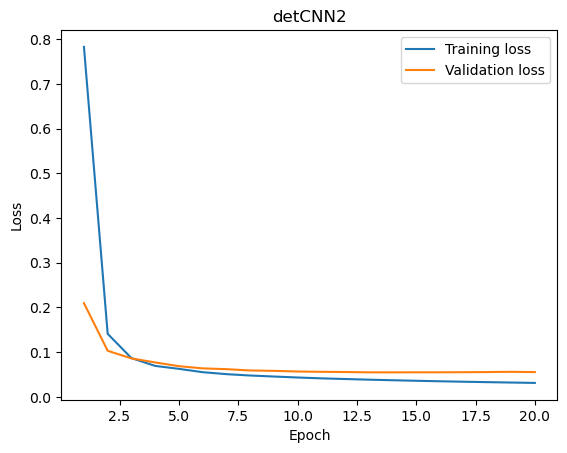

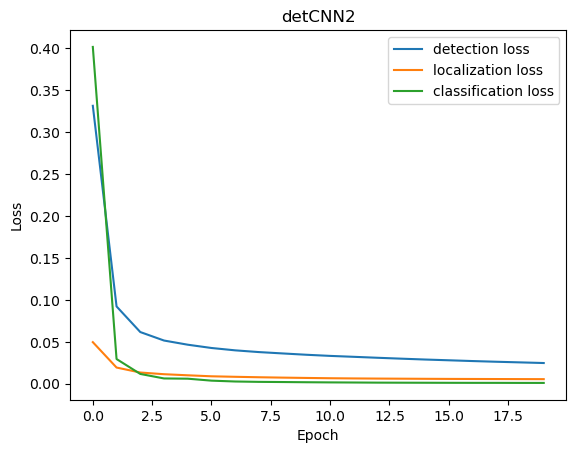

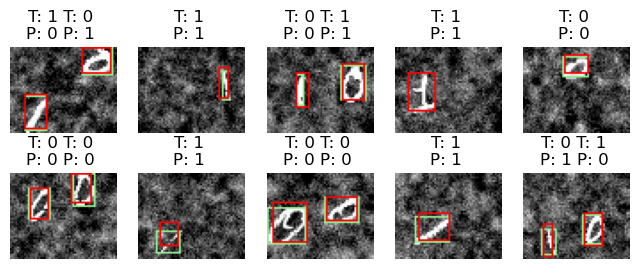

In [30]:
model_name = 'detCNN2'
torch.manual_seed(SEED)
modelcnn2 = DetCNN2()
modelcnn2.to(device=device)
optimizer = optim.SGD(modelcnn2.parameters(), lr=lr, momentum=momentum, weight_decay=decay)

loss_train2, loss_val2, train_performance2, val_performance2, losses_separated2 = train(
    n_epochs=n_epochs,
    optimizer=optimizer,
    model=modelcnn2,
    loss_fn=loss_fn,
    train_loader=train_loader,
    val_loader=val_loader,
    performance_calculator=detection_performance
)

plot_loss(loss_train2, loss_val2, model_name, save_model=True)
plot_lists(losses_separated2, ['detection loss', 'localization loss', 'classification loss'], model_name, save_model=True)
y_true, y_pred = predict(modelcnn2, val_loader, binary_class=True)
imgs = [img for img,_ in val_imgs]
y_pred_reshaped = y_pred.permute(0,2,3,1)
y_pred_global = local_to_global_list(y_pred_reshaped)
plot_detection_data(imgs, val_labels, y_pred_global, start_idx=10)

#### Model Selection

In [31]:
best_model, best_performance = model_selector([modelcnn1, modelcnn2], [val_performance1[-1],val_performance2[-1]])

# Print additional details of the best model
print("Best Model Details\n--------------------------------------------------------------")
print(f"Network architecture/ layout: {best_model}\n")
#print(f"Optimizer Parameters: {best_data.optimizer")
print(f"Validation Performance: {best_performance}")
#print(f"Validation Accuracy {round(best_data['model_man_val_accuracy'], 2)}")

Best Model Details
--------------------------------------------------------------
Network architecture/ layout: DetCNN1(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 2), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv7): Conv2d(32, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 

#### Model Evaluation

In [32]:
test_performance = detection_performance(best_model, test_loader)
print(10*'-'+'Test Performance' + 10*'-')
print(f"Mean Average Precision: {test_performance[-1]}")

----------Test Performance----------
Mean Average Precision: 0.9074488210573656


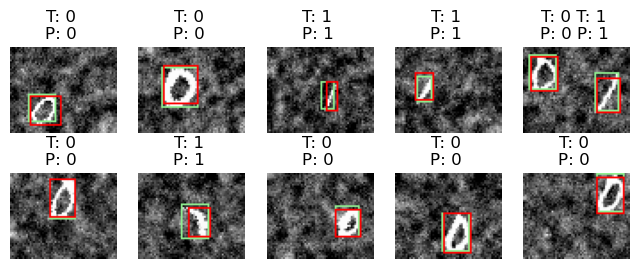

In [41]:
_, y_pred = predict(best_model, test_loader,binary_class=True)
test_imgs = torch.stack([img for img,_ in det_test])
y_pred_reshaped = y_pred.permute(0,2,3,1)
y_pred_global = local_to_global_list(y_pred_reshaped)

plot_detection_data(test_imgs, y_true=test_labels, y_pred=y_pred_global, start_idx=10, save_model=True)